<b><center>DATA MINING PROJECT</center></b>

<b><center>1.CLUSTERING</center></b>

<b>1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).</b>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import skew
%matplotlib inline
from scipy import stats
import statistics

In [38]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [39]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [41]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [42]:
df.shape

(210, 7)

In [43]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [44]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [26]:
print('Range of values: ', df['spending'].max()-df['spending'].min())
#Central values 
print('Minimum spending: ', df['spending'].min())
print('Maximum spending: ',df['spending'].max())
print('Mean value: ', df['spending'].mean())
print('Median value: ',df['spending'].median())
print('Mode value: ',df['spending'].mode())
print('Standard deviation: ', df['spending'].std())
print('Null values: ',df['spending'].isnull().any())
#Quartiles

Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(df['spending']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)

print('Number of outliers in spending upper : ', df[df['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', df[df['spending']<4.717499]['spending'].count())
print('% of Outlier in spending upper: ',round(df[df['spending']>24.8575]['spending'].count()*100/len(df)), '%')
print('% of Outlier in spending lower: ',round(df[df['spending']<4.717499]['spending'].count()*100/len(df)), '%')

Range of values:  10.59
Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Mode value:  0    11.23
1    14.11
2    15.38
dtype: float64
Standard deviation:  2.909699430687361
Null values:  False
spending - 1st Quartile (Q1) is:  12.27
spending - 3st Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035
Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575
Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0 %
% of Outlier in spending lower:  0 %


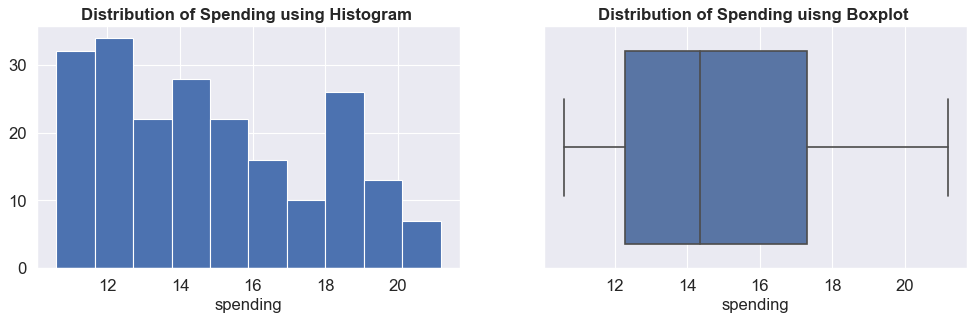

<Figure size 432x288 with 0 Axes>

In [13]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['spending'])
plt.xlabel('spending', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of Spending using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='spending',data=df)
plt.xlabel('spending', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of Spending uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


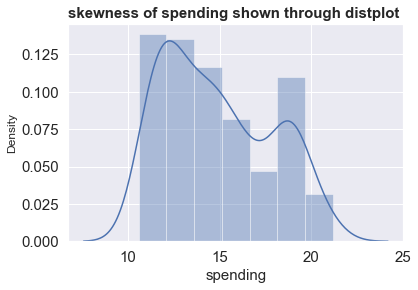

In [14]:
#distplot
sns.distplot(df['spending'])
plt.xlabel('spending', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of spending shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [30]:
print('Range of values: ', df['advance_payments'].max()-df['advance_payments'].min())
#Central values 
print('Minimum advance_payments: ', df['advance_payments'].min())
print('Maximum advance_payments: ',df['advance_payments'].max())
print('Mean value: ', df['advance_payments'].mean())
print('Median value: ',df['advance_payments'].median())
print('Mode value: ',df['advance_payments'].mode())
print('Standard deviation: ', df['advance_payments'].std())
print('Null values: ',df['advance_payments'].isnull().any())

#Quartiles

Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ', Q1)
print('advance_payments - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(df['advance_payments']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)

print('Number of outliers in advance_payments upper : ', df[df['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payments lower : ', df[df['advance_payments']<10.052499]['advance_payments'].count())
print('% of Outlier in advance_payments upper: ',round(df[df['advance_payments']>19.1125]['advance_payments'].count()*100/len(df)), '%')
print('% of Outlier in advance_payments lower: ',round(df[df['advance_payments']<10.052499]['advance_payments'].count()*100/len(df)), '%')

Range of values:  4.84
Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Mode value:  0    13.47
dtype: float64
Standard deviation:  1.305958726564022
Null values:  False
advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3st Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments is  2.2650000000000006
Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125
Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0
% of Outlier in advance_payments upper:  0 %
% of Outlier in advance_payments lower:  0 %


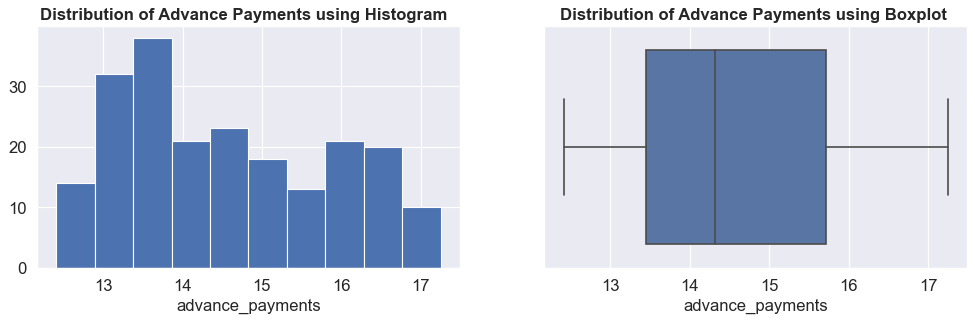

<Figure size 432x288 with 0 Axes>

In [16]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['advance_payments'])
plt.xlabel('advance_payments', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Advance Payments using Histogram  ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='advance_payments',data=df)
plt.xlabel('advance_payments', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Advance Payments using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


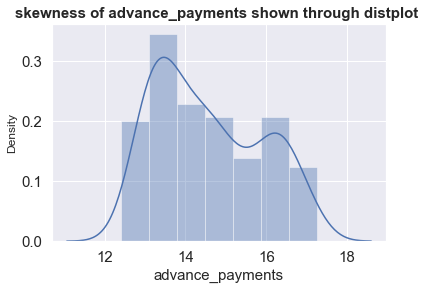

In [17]:
#distplot
sns.distplot(df['advance_payments'])
plt.xlabel('advance_payments', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of advance_payments shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [32]:
print('Range of values: ', df['probability_of_full_payment'].max()-df['probability_of_full_payment'].min())
#Central values 
print('Minimum probability_of_full_payment ', df['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',df['probability_of_full_payment'].max())
print('Mean value: ', df['probability_of_full_payment'].mean())
print('Median value: ',df['probability_of_full_payment'].median())
print('Mode value: ',df['probability_of_full_payment'].mode())
print('Standard deviation: ', df['probability_of_full_payment'].std())
print('Null values: ',df['probability_of_full_payment'].isnull().any())

#Quartiles

Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(df['probability_of_full_payment']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)
print('Number of outliers in probability_of_full_payment upper : ', df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment lower : ', df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count())
print('% of Outlier in probability_of_full_payment upper: ',round(df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count()*100/len(df)), '%')
print('% of Outlier in probability_of_full_payment lower: ',round(df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()*100/len(df)), '%')

Range of values:  0.11019999999999996
Minimum probability_of_full_payment  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Mode value:  0    0.8823
dtype: float64
Standard deviation:  0.0236294165838465
Null values:  False
probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3st Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986
Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875
Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper:  0 %
% of Outlier in probability_of_full_payment lower:  1 %


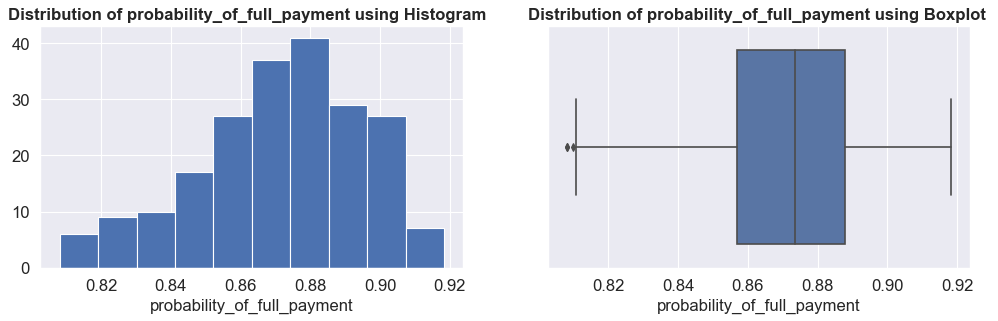

<Figure size 432x288 with 0 Axes>

In [19]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['probability_of_full_payment'])
plt.xlabel('probability_of_full_payment', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of probability_of_full_payment using Histogram  ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='probability_of_full_payment',data=df)
plt.xlabel('probability_of_full_payment', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of probability_of_full_payment using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


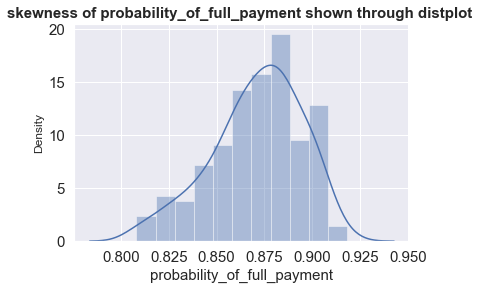

In [20]:
#distplot
sns.distplot(df['probability_of_full_payment'])
plt.xlabel('probability_of_full_payment', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of probability_of_full_payment shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [33]:
print('Range of values: ', df['current_balance'].max()-df['current_balance'].min())
#Central values 
print('Minimum current_balance: ', df['current_balance'].min())
print('Maximum current_balance: ',df['current_balance'].max())
print('Mean value: ', df['current_balance'].mean())
print('Median value: ',df['current_balance'].median())
print('Mode value: ',df['current_balance'].mode())
print('Standard deviation: ', df['current_balance'].std())
print('Null values: ',df['current_balance'].isnull().any())

#Quartiles

Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ', Q1)
print('current_balance - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance is ', stats.iqr(df['current_balance']))

#Outlier detection from Interquartile range (IQR) in data(df)

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)

print('Number of outliers in current_balance upper : ', df[df['current_balance']>7.056000000000001]['current_balance'].count())
print('Number of outliers in current_balance lower : ', df[df['current_balance']<4.186]['current_balance'].count())
print('% of Outlier in current_balance upper: ',round(df[df['current_balance']>7.056000000000001]['current_balance'].count()*100/len(df)), '%')
print('% of Outlier in current_balance lower: ',round(df[df['current_balance']<4.186]['current_balance'].count()*100/len(df)), '%')

Range of values:  1.7759999999999998
Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Mode value:  0    5.236
1    5.395
dtype: float64
Standard deviation:  0.44306347772644944
Null values:  False
current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3st Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance is  0.7175000000000002
Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001
Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0
% of Outlier in current_balance upper:  0 %
% of Outlier in current_balance lower:  0 %


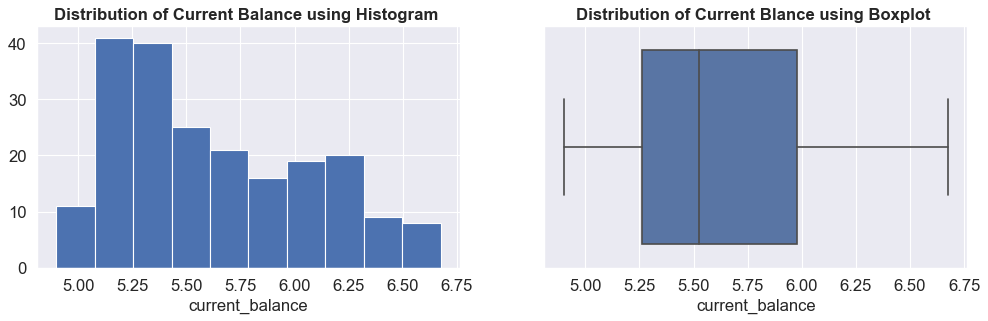

<Figure size 432x288 with 0 Axes>

In [22]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['current_balance'])
plt.xlabel('current_balance', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Current Balance using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='current_balance',data=df)
plt.xlabel('current_balance', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Current Blance using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


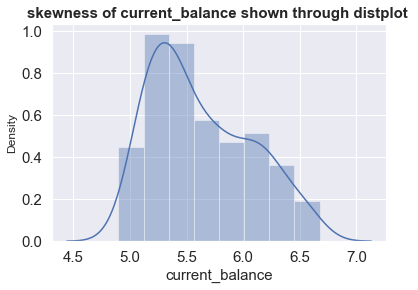

In [23]:
#distplot
sns.distplot(df['current_balance'])
plt.xlabel('current_balance', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of current_balance shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [34]:
print('Range of values: ', df['credit_limit'].max()-df['credit_limit'].min())
#Central values 
print('Minimum credit_limit: ', df['credit_limit'].min())
print('Maximum credit_limit: ',df['credit_limit'].max())
print('Mean value: ', df['credit_limit'].mean())
print('Median value: ',df['credit_limit'].median())
print('Mode value: ',df['credit_limit'].mode())
print('Standard deviation: ', df['credit_limit'].std())
print('Null values: ',df['credit_limit'].isnull().any())

#Quartiles

Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ', Q1)
print('credit_limit - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(df['credit_limit']))

#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)

print('Number of outliers in credit_limit upper : ', df[df['credit_limit']>4.488375]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', df[df['credit_limit']<2.017375]['credit_limit'].count())
print('% of Outlier in credit_limit upper: ',round(df[df['credit_limit']>4.488375]['credit_limit'].count()*100/len(df)), '%')
print('% of Outlier in credit_limit lower: ',round(df[df['credit_limit']<2.017375]['credit_limit'].count()*100/len(df)), '%')

Range of values:  1.4030000000000005
Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Mode value:  0    3.026
dtype: float64
Standard deviation:  0.37771444490658734
Null values:  False
credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3st Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775
Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375
Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0
% of Outlier in credit_limit upper:  0 %
% of Outlier in credit_limit lower:  0 %


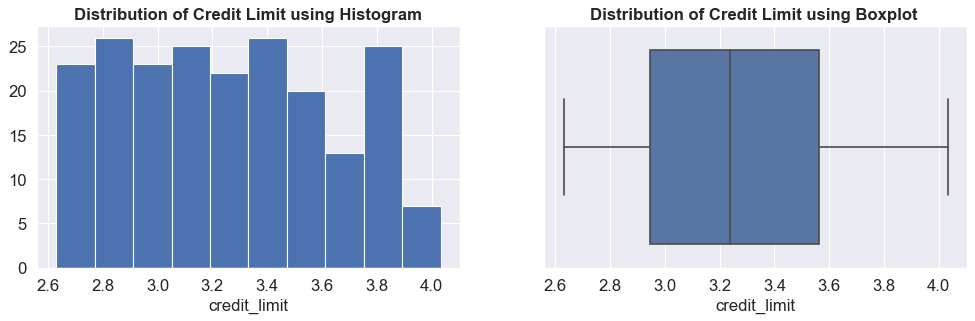

<Figure size 432x288 with 0 Axes>

In [25]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['credit_limit'])
plt.xlabel('credit_limit', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Credit Limit using Histogram', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='credit_limit',data=df)
plt.xlabel('credit_limit', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Credit Limit using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


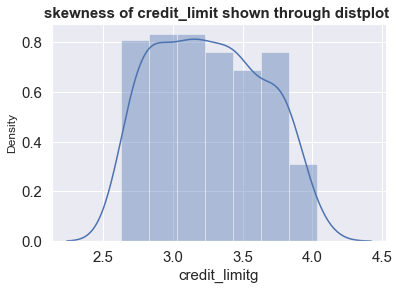

In [26]:
#distplot
sns.distplot(df['credit_limit'])
plt.xlabel('credit_limitg', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of credit_limit shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [35]:
print('Range of values: ', df['min_payment_amt'].max()-df['min_payment_amt'].min())
#Central values 
print('Minimum min_payment_amt: ', df['min_payment_amt'].min())
print('Maximum min_payment_amt: ',df['min_payment_amt'].max())
print('Mean value: ', df['min_payment_amt'].mean())
print('Median value: ',df['min_payment_amt'].median())
print('Mode value: ',df['min_payment_amt'].mode())
print('Standard deviation: ', df['min_payment_amt'].std())
print('Null values: ',df['min_payment_amt'].isnull().any())

#Quartiles

Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt is ', stats.iqr(df['min_payment_amt']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)

print('Number of outliers in min_payment_amt upper : ', df[df['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', df[df['min_payment_amt']<-0.749375]['min_payment_amt'].count())
print('% of Outlier in min_payment_amt upper: ',round(df[df['min_payment_amt']>8.079625]['min_payment_amt'].count()*100/len(df)), '%')
print('% of Outlier in min_payment_amt lower: ',round(df[df['min_payment_amt']<-0.749375]['min_payment_amt'].count()*100/len(df)), '%')

Range of values:  7.690899999999999
Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Mode value:  0    2.129
1    2.221
2    2.700
dtype: float64
Standard deviation:  1.5035571308217792
Null values:  False
min_payment_amt - 1st Quartile (Q1) is:  2.5615
min_payment_amt - 3st Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt is  2.2072499999999997
Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625
Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0
% of Outlier in min_payment_amt upper:  1 %
% of Outlier in min_payment_amt lower:  0 %


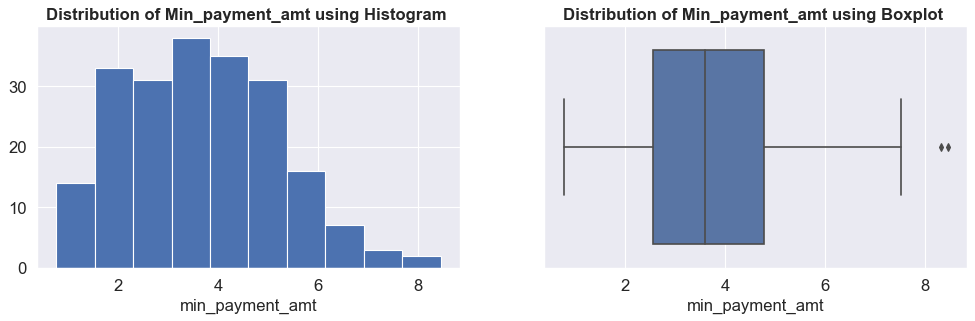

<Figure size 432x288 with 0 Axes>

In [28]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['min_payment_amt'])
plt.xlabel('min_payment_amt', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Min_payment_amt using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='min_payment_amt',data=df)
plt.xlabel('min_payment_amt', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Min_payment_amt using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


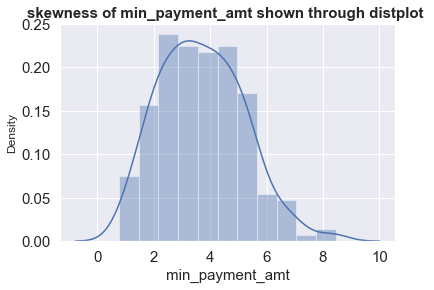

In [29]:
#distplot
sns.distplot(df['min_payment_amt'])
plt.xlabel('min_payment_amt', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of min_payment_amt shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [36]:
print('Range of values: ', df['max_spent_in_single_shopping'].max()-df['max_spent_in_single_shopping'].min())
#Central values 
print('Minimum max_spent_in_single_shopping: ', df['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shoppings: ',df['max_spent_in_single_shopping'].max())
print('Mean value: ', df['max_spent_in_single_shopping'].mean())
print('Median value: ',df['max_spent_in_single_shopping'].median())
print('Mode value: ',df['max_spent_in_single_shopping'].mode())
print('Standard deviation: ', df['max_spent_in_single_shopping'].std())
print('Null values: ',df['max_spent_in_single_shopping'].isnull().any())

#Quartiles

Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(df['max_spent_in_single_shopping']))

#Quartiles

Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(df['max_spent_in_single_shopping']))

print('Number of outliers in max_spent_in_single_shopping upper : ', df[df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ', df[df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count())
print('% of Outlier in max_spent_in_single_shopping upper: ',round(df[df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count()*100/len(df)), '%')
print('% of Outlier in max_spent_in_single_shopping lower: ',round(df[df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count()*100/len(df)), '%')

Range of values:  2.0309999999999997
Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shoppings:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Mode value:  0    5.001
dtype: float64
Standard deviation:  0.49148049910240543
Null values:  False
max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999
max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999
Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0
% of Outlier in max_spent_in_single_shopping upper:  0 %
% of Outlier in max_spent_in_single_shopping lower:  0 %


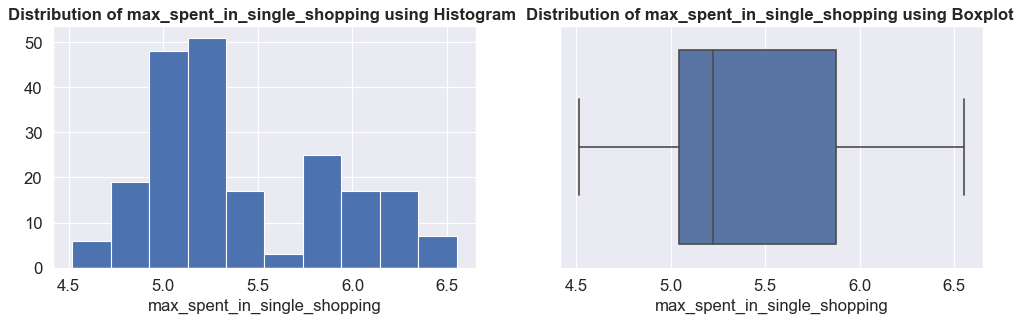

<Figure size 432x288 with 0 Axes>

In [31]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['max_spent_in_single_shopping'])
plt.xlabel('max_spent_in_single_shopping', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of max_spent_in_single_shopping using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='max_spent_in_single_shopping',data=df)
plt.xlabel('max_spent_in_single_shopping', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of max_spent_in_single_shopping using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


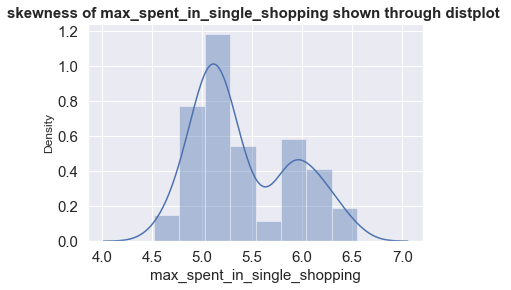

In [32]:
#distplot
sns.distplot(df['max_spent_in_single_shopping'])
plt.xlabel('max_spent_in_single_shopping', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of max_spent_in_single_shopping shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [33]:
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

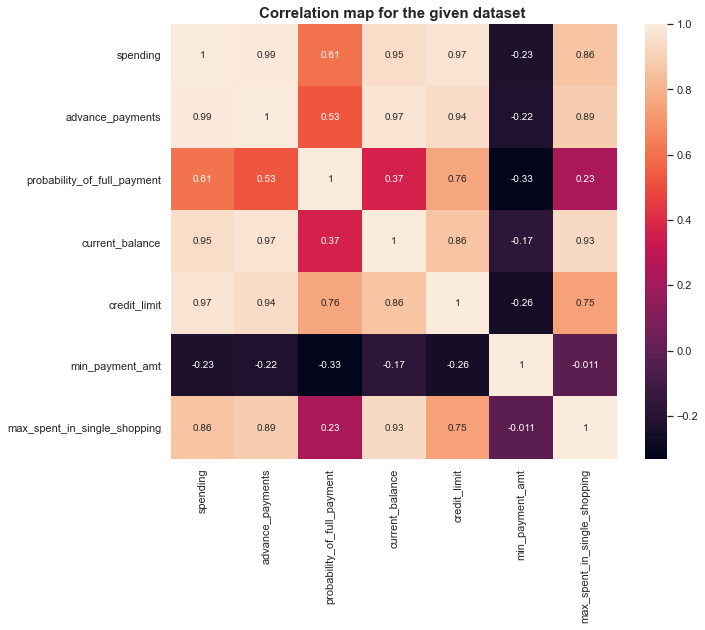

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation map for the given dataset ', fontsize=15,fontweight='bold')

plt.show()

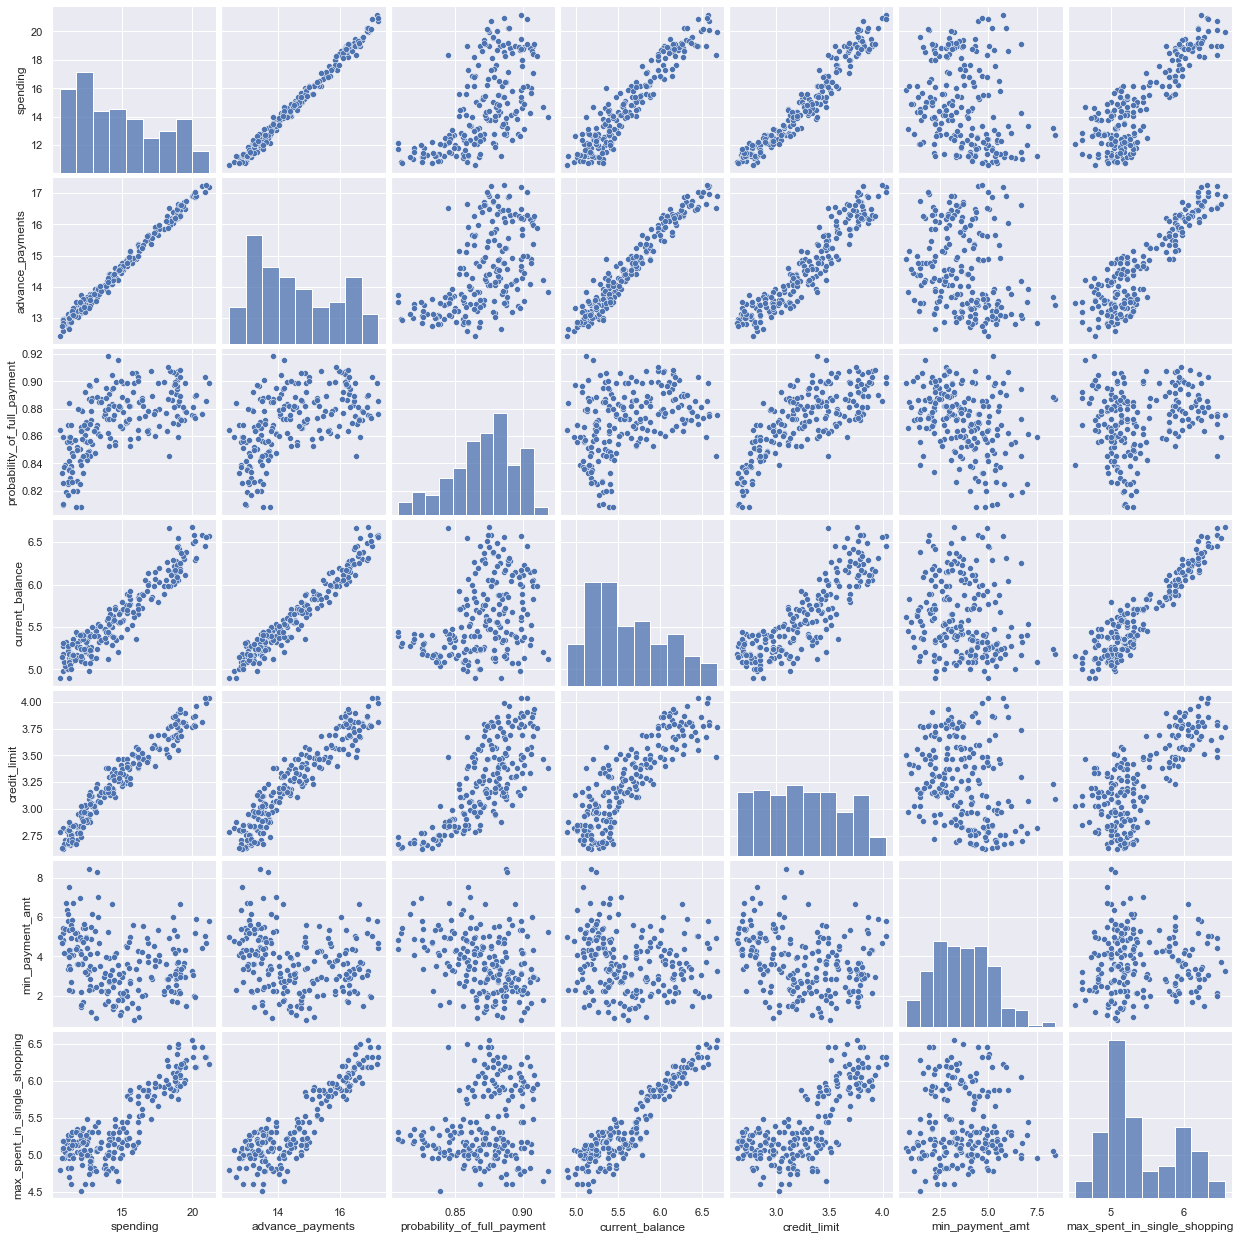

In [35]:
sns.pairplot(df)
plt.show()

<b>1.2  Do you think scaling is necessary for clustering in this case? Justify</b>

In [36]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [46]:
#importing the standard scaler
from sklearn.preprocessing import StandardScaler
#Standard scaler uses simple standardisation or normalisation
#Standard scaler uses the z-score computation
#it computes the z-score of all the values in each and every column iwth mean 0 and std deviation 1
#it basically centers all the values around 0

In [47]:
#creating an object for the standard scaler
sc=StandardScaler()

In [48]:
df_scaled = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [49]:
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


<b>1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them</b>

In [50]:
from scipy.cluster.hierarchy import dendrogram,linkage
#dendrogram and linkage are two functions present inside this library
#dendrogram takes care of visualisation of linkage
#linkage is for computing the distances and merging the clusters from n to 1

In [51]:
#we are creating a linkage uisng ward's method
y=linkage(df_scaled,method='ward')

In [52]:
#we are creating a linkage uisng ward's method
#y=linkage(df_scaled,method='ward')

Text(0.5, 1.0, 'Customer Segmentation Dendograms')

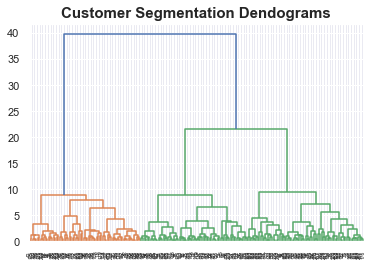

In [53]:
dend=dendrogram(y)
plt.title("Customer Segmentation Dendograms",fontsize=15,fontweight='bold')

#from the ouput , we can see that there are two clusters formed.One in orange color and the other in Green color

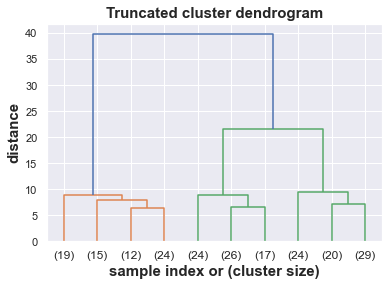

In [54]:
#for better visualisation
#here they show only the last 10 merges that have been done.
#the method used is lastp which means to take last p merges and here we have given the p value=10
dend=dendrogram(y,truncate_mode='lastp',p=10)
plt.xlabel('sample index or (cluster size)',fontsize=15,fontweight='bold')
plt.ylabel('distance',fontsize=15,fontweight='bold')
plt.title('Truncated cluster dendrogram',fontsize=15,fontweight='bold')
plt.show()

In [46]:
#every horizontal line in the above figure denotes a merge
#interpretation:total number of observations in the red cluster =19+15+12+24=70
                #total number of observations in the green cluster=24+26+17+24+20+29=140
#Green cluster has maximum data(customers) into it

In [55]:
from scipy.cluster.hierarchy import fcluster


#f-cluster means forming the cluster
#we will obtain the clusters or customers belonging to each of these two clusters for final verification

In [56]:
#method 1-maximum clusters
clusters=fcluster(y,3,criterion='maxclust')


#y-wardlink(linkage heights values that are stored within the ward's link method)
#3- we are instructing the fcluster to create 3 clusters
#when we give 3, the python will divide the given data into 3 clusters based on the maxclust criteria

In [57]:
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [58]:
df1=df.copy()

In [59]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [60]:
df1['clusters_hierarchy']=clusters

In [61]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [54]:
#if we calculate the mean of all the variables in cluster 1 individually, we get the centroid of the cluster1

<b>1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.</b>

In [62]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [63]:
from sklearn.cluster import KMeans
#since kmeans is a distance based calculation,we need to ensure that the data is transformed or sclaed before applying kmeans.
#we obtain the ideal number of clusters from kmeans clustering using wss plot

In [64]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [65]:
k_means = KMeans(n_clusters = 2)

In [66]:
# Fit K means on the scaled_df
k_means.fit(df_scaled)

KMeans(n_clusters=2)

In [67]:
# Get the labels
k_means.labels_
#cluster maaping is given as the output

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [68]:
print("K-means inertia for clusters=2",k_means.inertia_)
#inertia is the total within sum of squares when k=2
#within sum of squares for each cluster is measured by computing the distance between each observation and its corresponding centroid and squaring it and adding it up for every cluster .
#so here,inertia for both the clusters are added together and given the below output.
#larger the cluster,within sum of squares within the clusters gert reduced,i.e., inertia get reduced as number of clusters increased.

K-means inertia for clusters=2 659.1717544870411


In [69]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 3,random_state=1)
k_means = KMeans(n_clusters = 3)
k_means = KMeans(n_clusters = 3)
# Fit K means on the scaled_df
print(k_means.fit(df_scaled))
# Get the labels
print("\n",k_means.labels_)
#cluster maaping is given as the output
print("\nK-means inertia for clusters=3",k_means.inertia_)

KMeans(n_clusters=3)

 [0 2 0 1 0 1 1 2 0 1 0 2 1 0 2 1 2 1 1 1 1 1 0 1 2 0 2 1 1 1 2 1 1 2 1 1 1
 1 1 0 0 2 0 0 1 1 2 0 0 0 1 0 0 0 0 0 1 1 1 0 2 1 1 2 2 0 0 2 0 1 2 1 0 0
 1 0 2 1 0 2 2 2 2 0 1 2 0 2 0 1 2 0 2 1 1 0 0 0 1 0 2 0 2 0 2 0 0 1 1 0 2
 2 0 1 1 0 2 2 1 0 2 1 1 1 2 2 0 1 2 2 1 2 2 0 1 0 0 1 0 2 2 2 1 1 2 1 0 1
 2 1 2 1 2 2 1 2 2 1 2 0 0 1 0 0 0 1 2 2 2 1 2 1 2 0 0 0 2 1 2 1 2 2 2 2 0
 0 1 2 2 1 1 2 1 0 2 0 0 1 0 1 2 0 2 1 0 2 0 2 2 2]

K-means inertia for clusters=3 430.65897315130064


In [70]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 4,random_state=1)
k_means = KMeans(n_clusters = 4)
k_means = KMeans(n_clusters = 4)
# Fit K means on the scaled_df
print(k_means.fit(df_scaled))
# Get the labels
print("\n",k_means.labels_)
#cluster maaping is given as the output
print("\nK-means inertia for clusters=4",k_means.inertia_)

KMeans(n_clusters=4)

 [2 3 2 1 2 1 1 3 2 1 2 0 1 2 3 1 3 1 3 1 1 1 2 1 3 0 3 1 1 1 3 1 1 3 1 1 1
 1 1 2 2 3 0 2 1 1 3 2 2 2 1 2 2 2 2 0 1 1 1 2 3 1 1 0 3 2 2 3 2 3 3 1 2 2
 1 2 3 1 0 3 3 3 3 2 1 0 0 0 0 1 3 2 3 1 3 2 2 0 1 2 3 2 0 2 3 2 2 1 3 2 0
 3 2 1 1 0 3 0 1 2 3 1 1 1 3 3 2 1 3 3 1 3 3 2 1 2 2 1 0 3 0 3 1 1 3 1 2 1
 3 1 3 1 3 0 1 3 3 1 3 2 2 1 2 0 2 1 0 3 3 1 3 1 3 2 2 2 3 3 0 1 3 3 3 3 0
 0 3 0 3 1 3 3 1 2 3 0 2 1 2 1 3 0 3 1 0 3 0 3 0 0]

K-means inertia for clusters=4 371.2935481943967


In [71]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 5,random_state=1)
k_means = KMeans(n_clusters = 5)
k_means = KMeans(n_clusters = 5)
# Fit K means on the scaled_df
print(k_means.fit(df_scaled))
# Get the labels
print("\n",k_means.labels_)
#cluster maaping is given as the output
print("\nK-means inertia for clusters=5",k_means.inertia_)

KMeans(n_clusters=5)

 [4 1 4 2 4 2 2 3 4 2 4 1 2 4 3 3 1 2 3 2 3 2 4 2 1 0 3 2 2 2 3 2 2 1 2 2 2
 2 2 4 4 1 0 4 2 3 1 4 4 4 2 4 4 4 4 0 2 2 2 4 1 2 2 0 1 4 4 1 4 3 1 3 4 4
 2 4 1 2 0 1 1 3 1 4 2 0 0 0 0 2 3 4 1 2 3 4 4 0 2 0 3 4 1 4 1 4 4 2 3 4 0
 1 4 2 2 0 1 3 2 4 3 2 3 2 1 1 4 2 1 1 2 1 3 4 2 0 4 2 0 3 0 1 2 3 3 2 4 2
 1 2 1 3 1 0 3 1 3 2 1 0 4 3 4 0 4 2 0 1 3 2 1 2 1 4 4 4 1 3 1 2 1 3 3 1 0
 0 3 1 3 2 3 1 2 4 1 0 4 2 4 2 1 0 1 2 0 3 0 1 1 0]

K-means inertia for clusters=5 327.32810941927744


In [72]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 6,random_state=1)
k_means = KMeans(n_clusters = 6)
k_means = KMeans(n_clusters = 6)
# Fit K means on the scaled_df
print(k_means.fit(df_scaled))
# Get the labels
print("\n",k_means.labels_)
#cluster maaping is given as the output
print("\nK-means inertia for clusters=6",k_means.inertia_)

KMeans(n_clusters=6)

 [1 2 1 0 1 5 3 2 1 3 1 4 3 1 3 5 2 3 3 3 3 0 1 3 2 4 2 0 0 5 2 3 3 2 0 0 0
 5 0 1 1 2 4 1 0 3 2 1 1 1 3 1 1 1 1 4 5 0 0 1 2 3 0 4 2 1 1 2 1 3 2 3 1 1
 5 1 2 0 4 2 2 2 2 1 0 4 4 4 4 5 5 1 2 0 3 1 1 4 0 4 5 1 2 1 2 1 1 5 5 1 4
 2 1 5 0 4 2 5 0 1 3 0 5 3 2 2 1 0 2 2 0 2 3 1 0 1 1 3 4 2 4 2 3 3 3 3 1 0
 2 0 2 3 2 4 3 2 3 0 2 1 1 3 1 4 1 3 4 2 2 3 2 0 2 1 1 1 2 3 4 3 2 3 2 2 4
 4 3 4 2 0 3 2 0 1 2 4 1 5 1 0 2 4 2 0 4 2 4 2 2 4]

K-means inertia for clusters=6 289.5760810004942


In [73]:
wss =[] 
#wss means with sum of squares
#here we are apending various inertia values of various number of clusters to wss[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.2127816566134,
 289.315995389595,
 262.98186570162267,
 241.8189465608603,
 223.91254221002728,
 206.3961218478669]

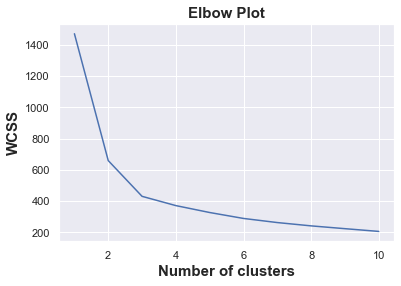

In [77]:
plt.plot(range(1,11),wss)
plt.title('Elbow Plot',fontsize=15,fontweight='bold')
plt.xlabel('Number of clusters',fontsize=15,fontweight='bold')
plt.ylabel('WCSS',fontsize=15,fontweight='bold')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


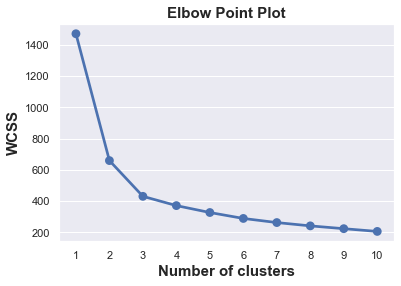

In [78]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss)
plt.title('Elbow Point Plot',fontsize=15,fontweight='bold')
plt.xlabel('Number of clusters',fontsize=15,fontweight='bold')
plt.ylabel('WCSS',fontsize=15,fontweight='bold')
plt.show()

In [79]:
df_1=df.copy()

In [80]:
df_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [81]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [88]:
df_1['clusters_kmeans']=labels
df_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [89]:
from sklearn.metrics import silhouette_samples, silhouette_score
#we are going to see whether silhouette score is positive for all these values

In [90]:
#silhouette score computes the average of all the silhouettes(for all the 210 observations-for the entire data)
#silhouette sample computes the silhouette score for each and every row(for every customer)
silhouette_score(df_scaled,labels,random_state=1)
#silhouette score has to be always positive to ensure that our clustering has been done properly
sil_width=silhouette_samples(df_scaled,labels)
df['sil_width']=sil_width
silhouette_samples(df_scaled,labels).min()
#by doing this, if we get a positive value it means that all the data has been correctly clustered;there is no incorrect clustering happened in our method
#this is how we ensure the accuaraccy of our clustering model.


0.002713089347678376

In [94]:
from sklearn import metrics

In [96]:
#silhouette scores for different number of clusters
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df_scaled)
    scores.append(metrics.silhouette_score(df_scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3276547677266192,
 0.2827335237380383,
 0.2885980140325899,
 0.2819058746607507,
 0.26644334449887014,
 0.2583120167794957,
 0.25230419288400546]

In [85]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0.362276


In [86]:
df1['clusters_hierarchy'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters_hierarchy, dtype: int64

In [87]:
df_1['clusters_kmeans'].value_counts().sort_index()

0    71
1    72
2    67
Name: clusters_kmeans, dtype: int64

<b>1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.</b>

Cluster Group Profiles Group 1 : High Spending Group 3 : Medium Spending Group 2 : Low Spending

Promotional strategies for each cluster Group 1 : High Spending Group Giving any reward points might increase their purchases.

maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
Increase there credit limit and
Increase spending habits
Give loan against the credit card, as they are customers with good repayment record.
Tie up with luxary brands, which will drive more one_time_maximun spending
Group 3 : Medium Spending Group

They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate.
Promote premium cards/loyality cars to increase transcations.
Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more
Group 2 : Low Spending Group

customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

<b><center>2.CART-RF-ANN</center></b>

<b>2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).</b>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [9]:
df2 = pd.read_csv("insurance_part2_data.csv")

In [10]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [12]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [13]:
df2.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [14]:
df2.shape

(3000, 10)

In [15]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df2.duplicated().sum()

139

In [17]:
print('Range of values: ', df2['Age'].max()-df2['Age'].min())

#Central values 
print('Minimum Age: ', df2['Age'].min())
print('Maximum Age: ',df2['Age'].max())
print('Mean value: ', df2['Age'].mean())
print('Median value: ',df2['Age'].median())
print('Mode value: ',df2['Age'].mode())
print('Standard deviation: ', df2['Age'].std())
print('Null values: ',df2['Age'].isnull().any())

#Quartiles

Q1=df2['Age'].quantile(q=0.25)
Q3=df2['Age'].quantile(q=0.75)
print('Age - 1st Quartile (Q1) is: ', Q1)
print('Age - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Age is ', stats.iqr(df2['Age']))

#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)
print('Number of outliers in Age upper : ', df2[df2['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', df2[df2['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',round(df2[df2['Age']>57.0]['Age'].count()*100/len(df2)), '%')
print('% of Outlier in Age lower: ',round(df2[df2['Age']<17.0]['Age'].count()*100/len(df2)), '%')

Range of values:  76
Minimum Age:  8
Maximum Age:  84
Mean value:  38.091
Median value:  36.0
Mode value:  0    36
dtype: int64
Standard deviation:  10.463518245377944
Null values:  False
Age - 1st Quartile (Q1) is:  32.0
Age - 3st Quartile (Q3) is:  42.0
Interquartile range (IQR) of Age is  10.0
Lower outliers in Age:  17.0
Upper outliers in Age:  57.0
Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  7 %
% of Outlier in Age lower:  0 %


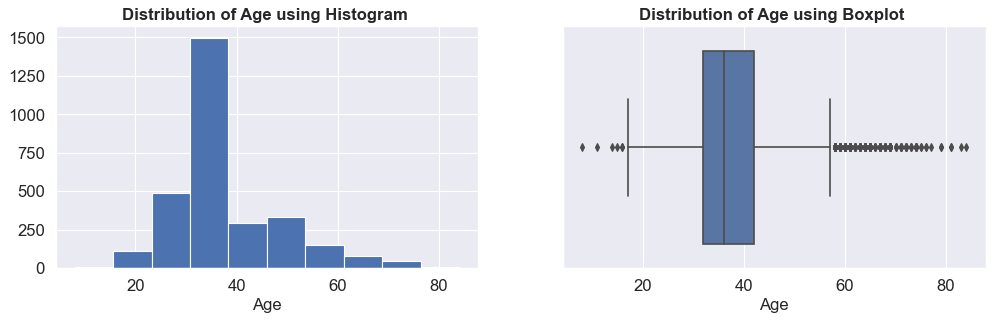

<Figure size 432x288 with 0 Axes>

In [182]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['Age'])
plt.xlabel('Age', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Age using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=df2)
plt.xlabel('Age', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Age using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


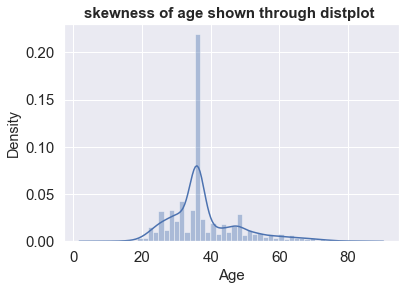

In [183]:
#distplot
sns.distplot(df2['Age'])
plt.xlabel('Age', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of age shown through distplot ', fontsize=15,fontweight='bold')
plt.show()


In [18]:
print('Range of values: ', df2['Commision'].max()-df2['Commision'].min())
#Central values 
print('Minimum Commision: ', df2['Commision'].min())
print('Maximum Commision: ',df2['Commision'].max())
print('Mean value: ', df2['Commision'].mean())
print('Median value: ',df2['Commision'].median())
print('Mode value: ',df2['Commision'].mode())
print('Standard deviation: ', df2['Commision'].std())
print('Null values: ',df2['Commision'].isnull().any())
#Quartiles

Q1=df2['Commision'].quantile(q=0.25)
Q3=df2['Commision'].quantile(q=0.75)
print('Commision - 1st Quartile (Q1) is: ', Q1)
print('Commision - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Commision is ', stats.iqr(df2['Commision']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)
print('Number of outliers in Commision upper : ', df2[df2['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', df2[df2['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',round(df2[df2['Commision']>43.0875]['Commision'].count()*100/len(df2)), '%')
print('% of Outlier in Commision lower: ',round(df2[df2['Commision']<-25.8525]['Commision'].count()*100/len(df2)), '%')

Range of values:  210.21
Minimum Commision:  0.0
Maximum Commision:  210.21
Mean value:  14.529203333333266
Median value:  4.63
Mode value:  0    0.0
dtype: float64
Standard deviation:  25.48145450662553
Null values:  False
Commision - 1st Quartile (Q1) is:  0.0
Commision - 3st Quartile (Q3) is:  17.235
Interquartile range (IQR) of Commision is  17.235
Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875
Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12 %
% of Outlier in Commision lower:  0 %


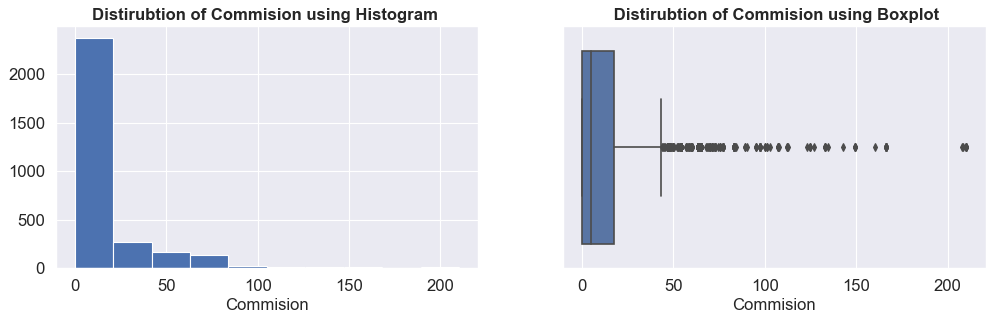

<Figure size 432x288 with 0 Axes>

In [185]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['Commision'])
plt.xlabel('Commision', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distirubtion of Commision using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Commision',data=df2)
plt.xlabel('Commision', fontsize=15)
plt.tick_params(labelsize=15)
plt.title(' Distirubtion of Commision using Boxplot', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


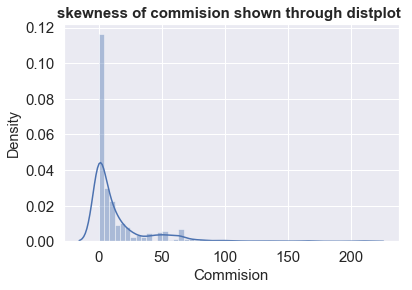

In [186]:
#distplot
sns.distplot(df2['Commision'])
plt.xlabel('Commision', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of commision shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [19]:
print('Range of values: ', df2['Duration'].max()-df2['Duration'].min())
#Central values 
print('Minimum Duration: ', df2['Duration'].min())
print('Maximum Duration: ',df2['Duration'].max())
print('Mean value: ', df2['Duration'].mean())
print('Median value: ',df2['Duration'].median())
print('Mode value: ',df2['Duration'].mode())
print('Standard deviation: ', df2['Duration'].std())
print('Null values: ',df2['Duration'].isnull().any())
#Quartiles

Q1=df2['Duration'].quantile(q=0.25)
Q3=df2['Duration'].quantile(q=0.75)
print('Duration - 1st Quartile (Q1) is: ', Q1)
print('Duration - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Duration is ', stats.iqr(df2['Duration']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

print('Number of outliers in Duration upper : ', df2[df2['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', df2[df2['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',round(df2[df2['Duration']>141.0]['Duration'].count()*100/len(df2)), '%')
print('% of Outlier in Duration lower: ',round(df2[df2['Duration']<-67.0]['Duration'].count()*100/len(df2)), '%')

Range of values:  4581
Minimum Duration:  -1
Maximum Duration:  4580
Mean value:  70.00133333333333
Median value:  26.5
Mode value:  0    8
dtype: int64
Standard deviation:  134.05331313253495
Null values:  False
Duration - 1st Quartile (Q1) is:  11.0
Duration - 3st Quartile (Q3) is:  63.0
Interquartile range (IQR) of Duration is  52.0
Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0
Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13 %
% of Outlier in Duration lower:  0 %


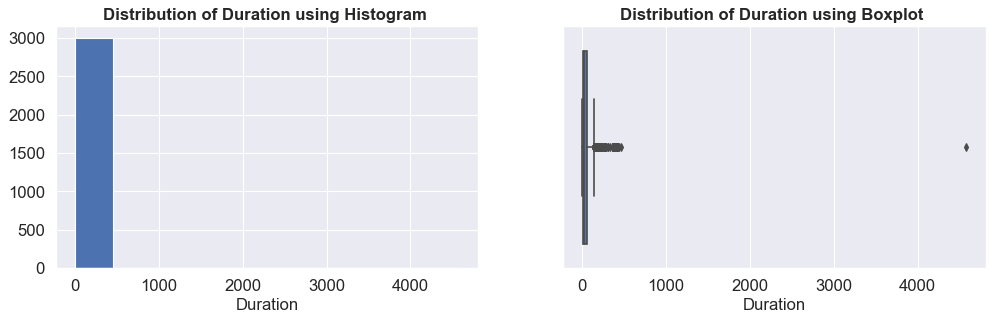

<Figure size 432x288 with 0 Axes>

In [188]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['Duration'])
plt.xlabel('Duration', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Duration using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Duration',data=df2)
plt.xlabel('Duration', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Duration using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


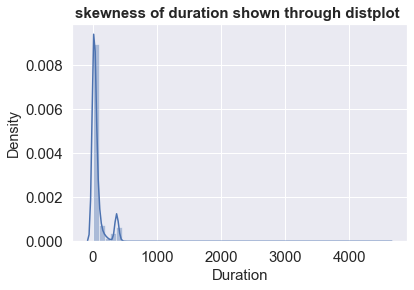

In [189]:
#distplot
sns.distplot(df2['Duration'])
plt.xlabel('Duration', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of duration shown through distplot ', fontsize=15,fontweight='bold')
plt.show()


In [20]:
print('Range of values: ', df2['Sales'].max()-df2['Sales'].min())
#Central values 
print('Minimum Sales: ', df2['Sales'].min())
print('Maximum Sales: ',df2['Sales'].max())
print('Mean value: ', df2['Sales'].mean())
print('Median value: ',df2['Sales'].median())
print('Mode value: ',df2['Sales'].mode())
print('Standard deviation: ', df2['Sales'].std())
print('Null values: ',df2['Sales'].isnull().any())
#Quartiles

Q1=df2['Sales'].quantile(q=0.25)
Q3=df2['Sales'].quantile(q=0.75)
print('Sales - 1st Quartile (Q1) is: ', Q1)
print('Sales - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Sales is ', stats.iqr(df2['Sales']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)
print('Number of outliers in Sales upper : ', df2[df2['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', df2[df2['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(df2[df2['Sales']>142.5]['Sales'].count()*100/len(df2)), '%')
print('% of Outlier in Sales lower: ',round(df2[df2['Sales']<-53.5]['Sales'].count()*100/len(df2)), '%')

Range of values:  539.0
Minimum Sales:  0.0
Maximum Sales:  539.0
Mean value:  60.24991333333344
Median value:  33.0
Mode value:  0    20.0
dtype: float64
Standard deviation:  70.73395353143047
Null values:  False
Sales - 1st Quartile (Q1) is:  20.0
Sales - 3st Quartile (Q3) is:  69.0
Interquartile range (IQR) of Sales is  49.0
Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5
Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12 %
% of Outlier in Sales lower:  0 %


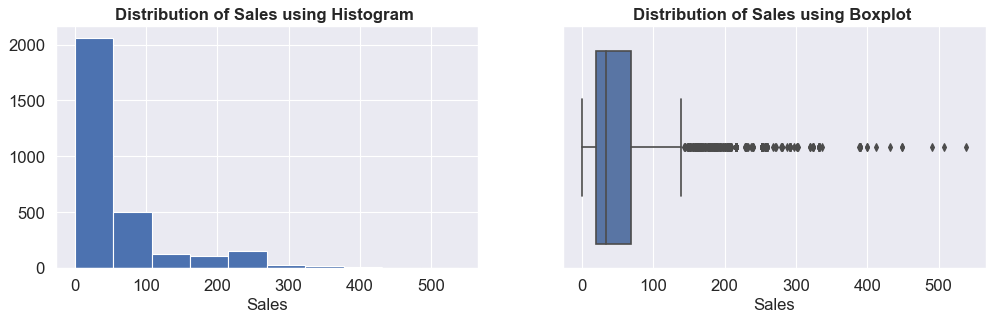

<Figure size 432x288 with 0 Axes>

In [191]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['Sales'])
plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Sales using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Sales',data=df2)
plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Sales using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


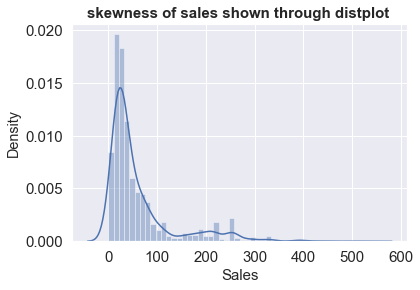

In [192]:
#distplot
sns.distplot(df2['Sales'])
plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of sales shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [193]:
df2.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [94]:
for column in df2[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




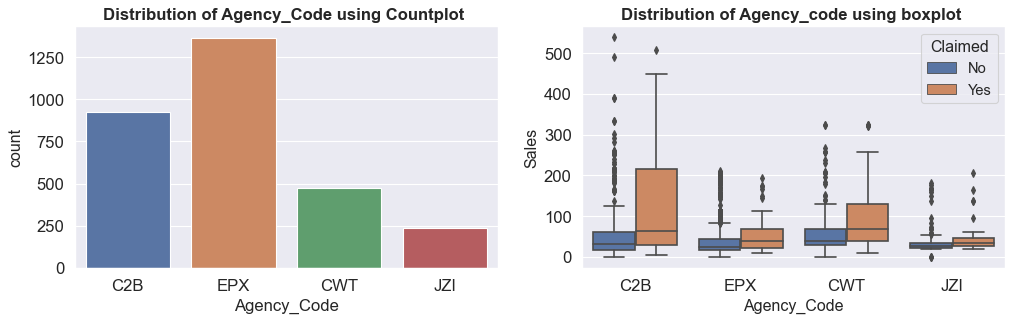

<Figure size 432x288 with 0 Axes>

In [194]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df2, x = 'Agency_Code')
plt.xlabel('Agency_Code', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Agency_Code using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Agency_Code',y='Sales', hue='Claimed',data=df2)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Agency_code using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

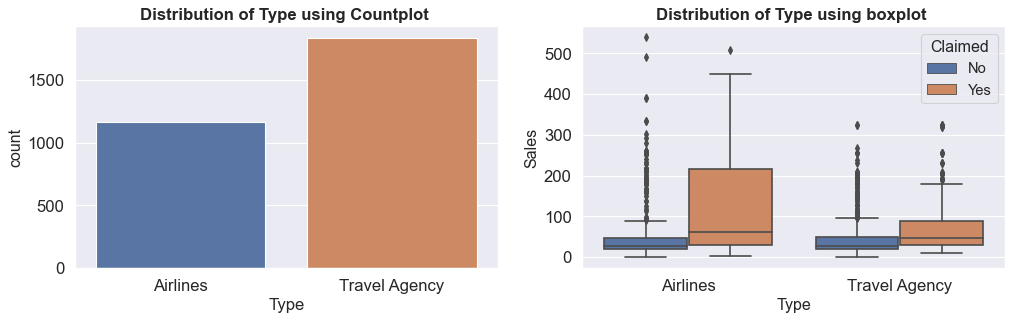

<Figure size 432x288 with 0 Axes>

In [195]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df2, x ='Type')
plt.xlabel('Type', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Type using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Type',y='Sales', hue='Claimed',data=df2)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Type using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

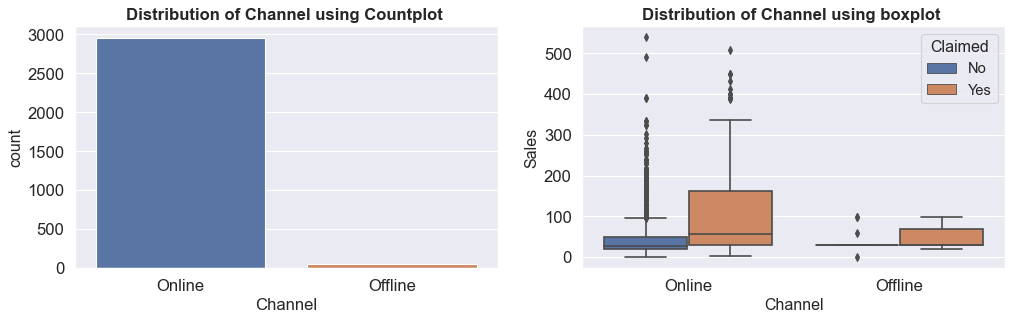

<Figure size 432x288 with 0 Axes>

In [196]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df2, x = 'Channel')
plt.xlabel('Channel', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Channel using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Channel',y='Sales', hue='Claimed',data=df2)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Channel using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

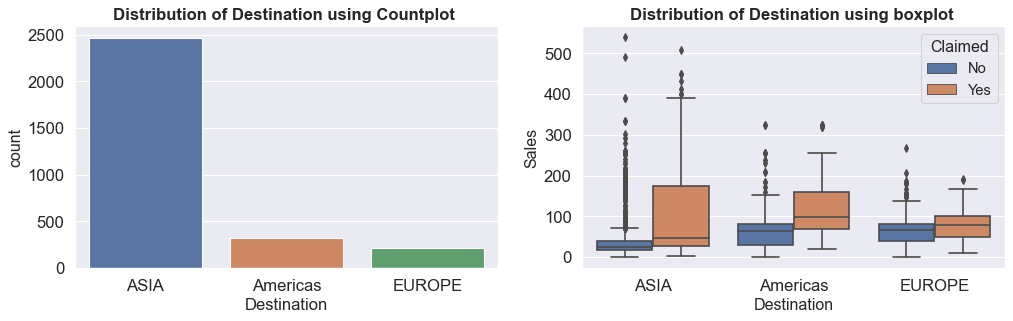

<Figure size 432x288 with 0 Axes>

In [197]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df2, x = 'Destination')
plt.xlabel('Destination', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Destination using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Sales', hue='Claimed',data=df2)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Destination using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

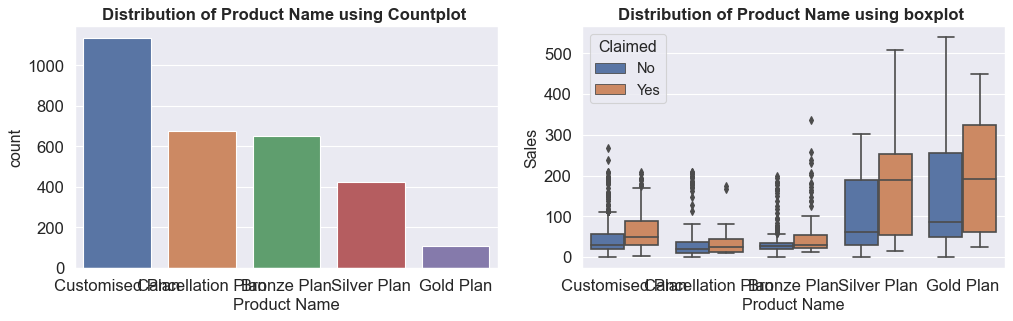

<Figure size 432x288 with 0 Axes>

In [198]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df2, x = 'Product Name')
plt.xlabel('Product Name', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Product Name using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Product Name',y='Sales', hue='Claimed',data=df2)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Product Name using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

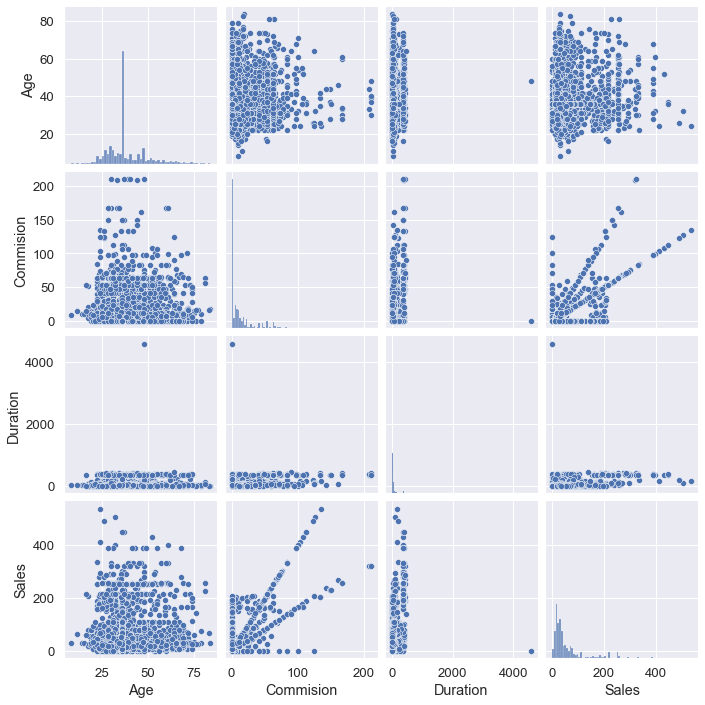

In [199]:
sns.pairplot(df2)
plt.show()

Text(0.5, 1.0, 'Mulitvariate Analysis using Heatmap. ')

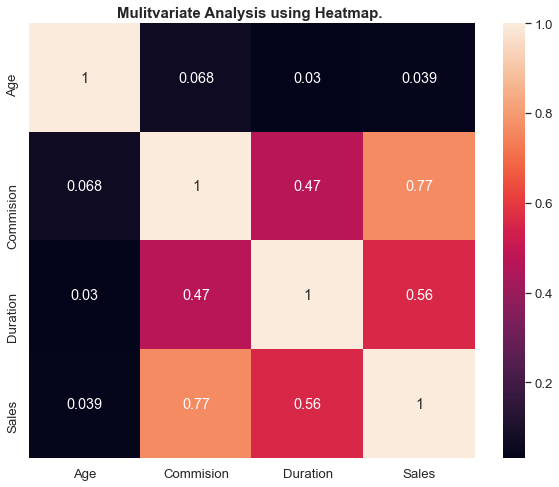

In [200]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df2.corr(), annot=True)
plt.title('Mulitvariate Analysis using Heatmap. ', fontsize=15,fontweight='bold')


In [222]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        df2[feature] = pd.Categorical(df2[feature]).codes

In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [224]:
for column in df2[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
3     239
1     472
0     924
2    1365
Name: Agency_Code, dtype: int64


TYPE :  2
0    1163
1    1837
Name: Type, dtype: int64


CLAIMED :  2
1     924
0    2076
Name: Claimed, dtype: int64


CHANNEL :  2
0      46
1    2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
3     109
4     427
0     650
1     678
2    1136
Name: Product Name, dtype: int64


DESTINATION :  3
2     215
1     320
0    2465
Name: Destination, dtype: int64




<b>2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network</b>

In [225]:
# capture the target column ("Claimed") into separate vectors for training set and test set

X = df2.drop("Claimed" , axis=1)

y = df2.pop("Claimed")

#now we have all the independant varibles in x and dependant variable in y

In [226]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

#when we run this code we get 4 outputs:
#1.training independant variable:X_train
#2.Testing independant variable:X_test
#3.Training dependant variable :train_lables(y_train)
#4.Testing dependant variable: test_labels(y_test)

In [181]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [182]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [183]:
from sklearn import tree

train_char_label = ['No', 'Yes']
INSURANCE_Tree_File = open('C:\insurance_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=INSURANCE_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

INSURANCE_Tree_File.close()

In [227]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7,8,9,10],
    'min_samples_leaf': [3,4,5,6,7],
    'min_samples_split': [115,116,117,118,119,120]
}

#param_grid_dtcl = {
    #'criterion': ['gini'],
    #'max_depth': [10,20,30,50],
    #'min_samples_leaf': [50,100,150], 
    #'min_samples_split': [150,300,450],
#}

df_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [185]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [115, 116, 117, 118, 119, 120]})

In [186]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 115}

In [187]:
best_grid = grid_search.best_estimator_

In [188]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [189]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [190]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1471
           1       0.73      0.55      0.63       629

    accuracy                           0.81      2100
   macro avg       0.78      0.73      0.75      2100
weighted avg       0.80      0.81      0.80      2100



In [191]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.74      0.46      0.57       295

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



In [192]:
confusion_matrix(train_labels,ytrain_predict)

array([[1342,  129],
       [ 280,  349]], dtype=int64)

In [193]:
confusion_matrix(test_labels,ytest_predict)

array([[556,  49],
       [158, 137]], dtype=int64)

In [194]:
print('Accuracy Score of the above created CART model is',round(accuracy_score(test_labels,ytest_predict),2)*100,'%')

Accuracy Score of the above created CART model is 77.0 %


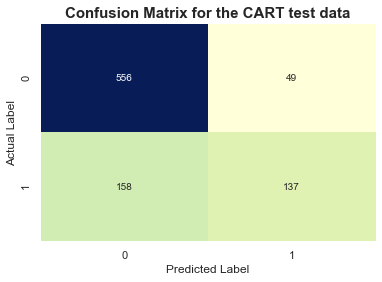

In [195]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for the CART test data',fontsize=15,fontweight='bold')
plt.show()

In [196]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.983333,0.016667
1,0.539474,0.460526
2,0.539474,0.460526
3,0.183168,0.816832
4,0.936877,0.063123


In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

AUC: 0.849


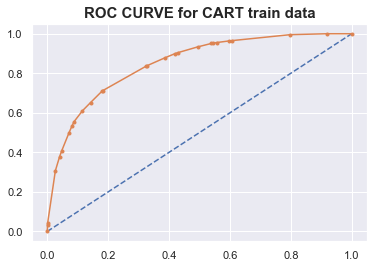

In [198]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC CURVE for CART train data',fontsize=15,fontweight='bold')
# show the plot
plt.show()

AUC: 0.797


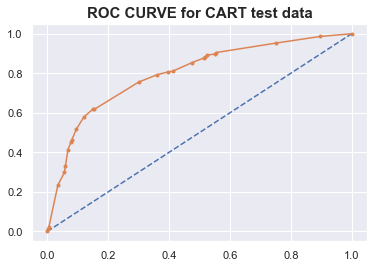

In [199]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC CURVE for CART test data',fontsize=15,fontweight='bold')
# show the plot
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


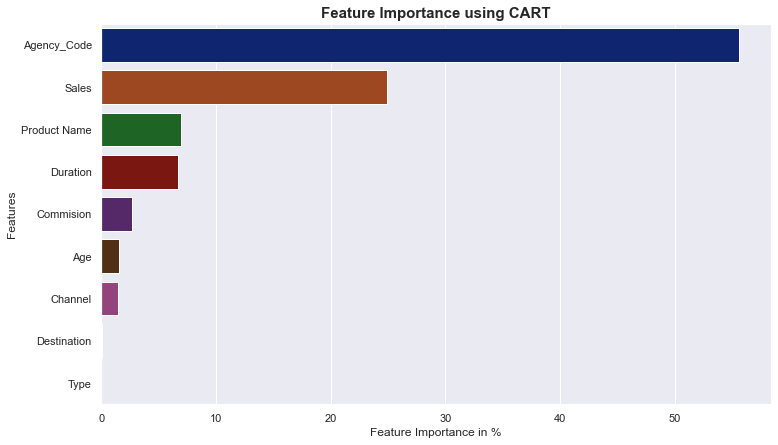

In [200]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using CART',fontsize=15,fontweight='bold')
plt.show()

In [201]:
print(pd.DataFrame(best_grid.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.556011
Sales         0.249295
Product Name  0.069635
Duration      0.067060
Commision     0.027085
Age           0.015485
Channel       0.014727
Destination   0.000701
Type          0.000000


<b><center>Random Forest</center></b>

In [228]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 7],
    'max_features': [4,6],
    'min_samples_leaf': [4,5],
    'min_samples_split': [110,115],
    'n_estimators': [101, 301]
}



rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [229]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7], 'max_features': [4, 6],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [110, 115],
                         'n_estimators': [101, 301]})

In [230]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 110,
 'n_estimators': 301}

In [231]:
best_grid = grid_search.best_estimator_

In [232]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [233]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [234]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.71      0.60      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [235]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [236]:
print('Accuracy Score of the above created RF model is',round(accuracy_score(test_labels,ytest_predict),2)*100,'%')

Accuracy Score of the above created RF model is 77.0 %


In [237]:
print(pd.DataFrame(best_grid.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.427417
Product Name  0.173782
Sales         0.170947
Commision     0.098954
Duration      0.064210
Age           0.040478
Type          0.016325
Destination   0.004959
Channel       0.002927


In [238]:
confusion_matrix(train_labels,ytrain_predict)

array([[1317,  154],
       [ 251,  378]], dtype=int64)

In [239]:
confusion_matrix(test_labels,ytest_predict)

array([[553,  52],
       [153, 142]], dtype=int64)

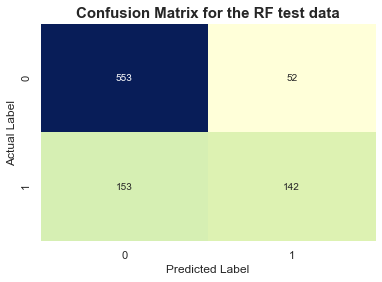

In [240]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for the RF test data',fontsize=15,fontweight='bold')
plt.show()

AUC: 0.854


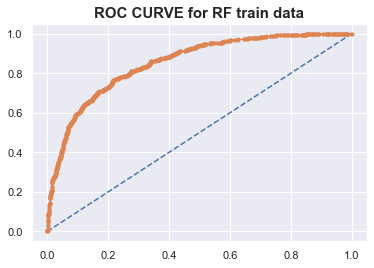

In [241]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC CURVE for RF train data',fontsize=15,fontweight='bold')
# show the plot
# show the plot
plt.show()

AUC: 0.821


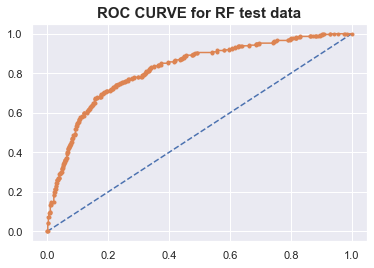

In [242]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC CURVE for RF test data',fontsize=15,fontweight='bold')
# show the plot
# show the plot
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


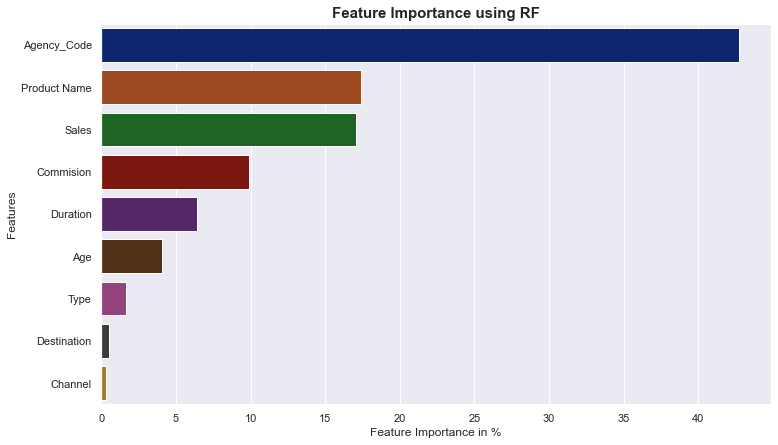

In [243]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF',fontsize=15,fontweight='bold')
plt.show()


In [244]:
print(pd.DataFrame(best_grid.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.427417
Product Name  0.173782
Sales         0.170947
Commision     0.098954
Duration      0.064210
Age           0.040478
Type          0.016325
Destination   0.004959
Channel       0.002927


<b><center>MLP CLASSIFIER</center></b>

In [245]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [246]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [247]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [248]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [249]:
best_grid = grid_search.best_estimator_

In [250]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [251]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [265]:
print('Accuracy Score  of the above created ANN model is',round(accuracy_score(test_labels,ytest_predict),2)*100,'%')

Accuracy Score  of the above created ANN model is 76.0 %


In [253]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1471
           1       0.66      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.74      2100
weighted avg       0.79      0.79      0.79      2100



In [254]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       605
           1       0.68      0.51      0.58       295

    accuracy                           0.76       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.75      0.76      0.75       900



In [255]:
confusion_matrix(train_labels,ytrain_predict)

array([[1271,  200],
       [ 241,  388]], dtype=int64)

In [256]:
confusion_matrix(test_labels,ytest_predict)

array([[534,  71],
       [144, 151]], dtype=int64)

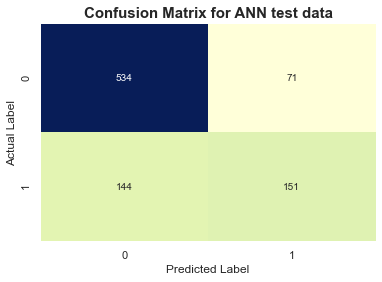

In [263]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for ANN test data',fontsize=15,fontweight='bold')
plt.show()

AUC: 0.677


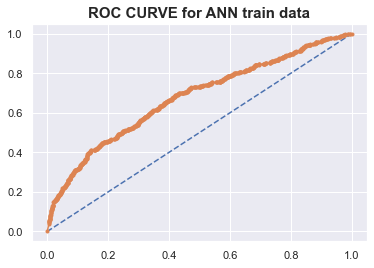

In [261]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC CURVE for ANN train data',fontsize=15,fontweight='bold')
# show the plot
plt.show()

AUC: 0.658


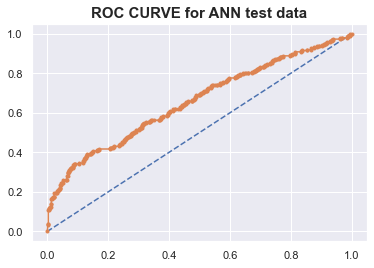

In [260]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC CURVE for ANN test data',fontsize=15,fontweight='bold')
# show the plot
plt.show()

<b>2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. </b>

<b>2.4 Final Model: Compare all the models and write an inference which model is best/optimized.</b>

In [ ]:
#I am selecting the RF model, as it has better accuracy, precision, recall, f1 score better, than other two CART & MLP

#We have also compared the Roc curves of the following models and as we can see the maximum Roc curve is of Random forest as well. It shows the model is working better 

<b>2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations</b>